# Static Visualizations in Python
### by [Jason DeBacker](http://jasondebacker.com), September 2021

This Jupyter Notebook will walk you through examples of plots using [Matplotlib](https://matplotlib.org) in Python.  We'll cover the types of plots commonly used in economics applications: line and bar graphs, histograms, scatter plots, and whisker plots.  We'll also look at representing geospatial data on shaded maps and plotting kernal desities of distributions.

As an application, we'll look at Chetty, Friedman, and Hendren's (and others') [Opportunity Insights Project](https://opportunityinsights.org).  This project, from which there are a series of [papers](https://opportunityinsights.org/paper/) seeks to document and understand variation in economic, health, and other outcomes across geography and time in the United States.  To do this, the project contributors have utilized adiministrative data from a number of sources, along with survey data, to consider childhood exposure to various factors and link that to adult outcomes.

There website that hosts this project has a number of different datasets available for other researchers.  We'll use data from ["Where is the Land of Opportunity? The Geography of Intergenerational Mobility in the United States"](https://eml.berkeley.edu/~saez/chetty-friedman-kline-saezQJE14mobility.pdf) by  Chetty, Hendren, Kline, and Saez (*Quarterly Journal of Economics*, 2014).  Specifically, we'll download the Excel workbook with the online data tables [here](https://opportunityinsights.org/data/).


## Line Plots

One of the major contributions of this project is a transiton matrix that gives the nation-wide probabiility of a child moving to another point in the income distribution than her parents.  The transitions in this matrix are thus inter-generational.  They tell us the probability of a child born in 1980-82 moving from a household with parents at a certain percentile in the distribution of family income to another percentile as an adult (family income of the child is measured in 2011-2012, when the child is not approximatley 30 years old).  

One measure of mobility is what is called the "immobility rate" or "staying probability". This is simply the average of the diagonal elements of the transition matrix.  To see how mobility varies over the distribution of family income, let's plot the staying probabilities at each percentile in the distribution of family income.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Read in data from Excel workbook directly from URL
transmat = pd.read_excel('http://www.equality-of-opportunity.org/data/descriptive/table1/online_data_tables.xls',
                         sheet_name="Online Data Table 1", header=0, skiprows=8, index_col=0)
# Note how select from certain work sheet
# Note how skip header rows
#look at data
transmat.head(n=10)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,0.002148,0.002240,0.002299,0.002280,0.002138,0.002399,0.002341,0.001976,0.002200,0.002412,...,0.004591,0.005001,0.005310,0.005391,0.0060,0.006800,0.007550,0.008998,0.010479,0.016997
4,0.174914,0.153774,0.140644,0.130811,0.125085,0.119752,0.117038,0.112468,0.111311,0.107979,...,0.028031,0.028506,0.027636,0.027848,0.0278,0.028446,0.029044,0.028694,0.028902,0.028594
7,0.013478,0.012728,0.012295,0.010995,0.010945,0.010596,0.010296,0.010063,0.009401,0.008928,...,0.002868,0.002701,0.003071,0.002848,0.0029,0.003000,0.002685,0.003099,0.003040,0.003399
8,0.021819,0.021484,0.019692,0.019620,0.019174,0.018493,0.018018,0.018322,0.015802,0.016316,...,0.004864,0.005001,0.005331,0.005260,0.0052,0.005026,0.005310,0.005499,0.005442,0.005499
9,0.020278,0.018829,0.018193,0.018738,0.017370,0.017593,0.017461,0.016204,0.016102,0.015961,...,0.005604,0.005301,0.005817,0.005513,0.0053,0.005351,0.005634,0.005699,0.005604,0.006399
10,0.019924,0.018738,0.018293,0.017897,0.016954,0.016993,0.016144,0.015333,0.015802,0.016042,...,0.005493,0.005601,0.005574,0.005634,0.0058,0.005797,0.005675,0.005699,0.005695,0.005899
11,0.019062,0.018555,0.018193,0.016914,0.016600,0.017793,0.016397,0.016569,0.016202,0.016316,...,0.005554,0.005601,0.005412,0.005341,0.0057,0.005483,0.005604,0.005799,0.006050,0.005699
12,0.020805,0.020684,0.019092,0.018687,0.018252,0.017393,0.017015,0.016539,0.016202,0.016752,...,0.005442,0.004901,0.005178,0.005209,0.0054,0.005533,0.005371,0.005399,0.005462,0.005399
13,0.021555,0.020076,0.019892,0.018464,0.018252,0.016993,0.017674,0.016731,0.017702,0.016873,...,0.005422,0.005001,0.005260,0.004996,0.0046,0.005290,0.004996,0.004899,0.005371,0.005299
14,0.020268,0.019579,0.018793,0.018150,0.017988,0.017793,0.017350,0.016661,0.016402,0.016721,...,0.005219,0.005201,0.005331,0.005067,0.0054,0.005290,0.004935,0.004899,0.005341,0.005499


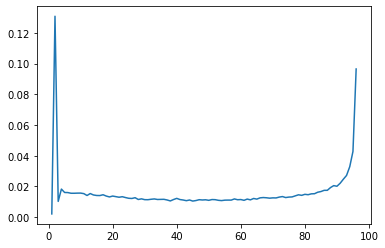

In [2]:
# Line plot by centile
# select diagonal - the probability stay in same percentile
# first, drop columns that don't have corresponding row
transmat.drop([2, 3, 5, 6], axis=1, inplace=True)
staying_probs = np.diag(transmat)
# range 1 to 100 for centile
x = range(1, len(staying_probs) + 1)
# simple plot
plt.plot(x, staying_probs)

[Text(0.5, 1.0, 'Mobility by Percentile of Family Income'),
 Text(0.5, 0, 'Percentile of Family Income'),
 Text(0, 0.5, 'Staying Probability')]

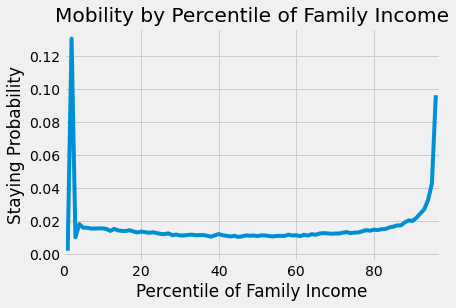

In [3]:
# Formatting options
plt.style.use('fivethirtyeight') # select a style (theme) for plot
fig, ax = plt.subplots() # make figure and axes separate objects
plt.plot(x, staying_probs, axes=ax)
ax.set_xlim([0, 97]) # set axis range
ax.set(title='Mobility by Percentile of Family Income', xlabel='Percentile of Family Income',
       ylabel="Staying Probability") # plot title, axis labels

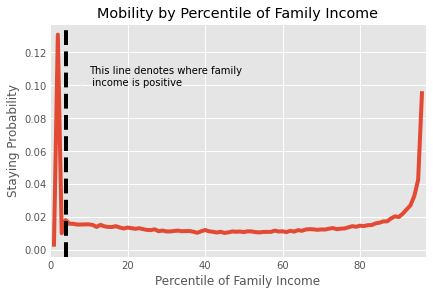

In [4]:
# Add vertical line (note centiles 1-6 are negative income)
plt.style.use('ggplot') # select a style (theme) for plot
fig, ax = plt.subplots() # make figure and axes separate objects
plt.plot(x, staying_probs, axes=ax)
ax.set_xlim([0, 97]) # set axis range
ax.set(title='Mobility by Percentile of Family Income', xlabel='Percentile of Family Income',
       ylabel="Staying Probability") # plot title, axis labels
ax.axvline(x=4, color='k', linestyle='--')
ax.set(title='Mobility by Percentile of Family Income', xlabel='Percentile of Family Income',
       ylabel="Staying Probability") # plot title, axis labels
plt.annotate(
        'This line denotes where family\n income is positive',
        xy=(7, 0.10), arrowprops=dict(arrowstyle='->'), xytext=(10, 0.1))
# save figure
fig.savefig('mobility.png', transparent=False, dpi=80, bbox_inches="tight")

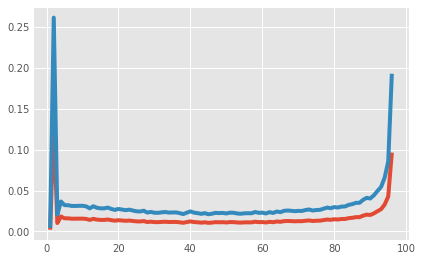

In [5]:
# A plot with two lines
plt.plot(x, staying_probs)
plt.plot(x, staying_probs * 2)

## Bar plots

We can represent these data as a bar plot as well.

Text(0.5, 1.0, 'Mobility')

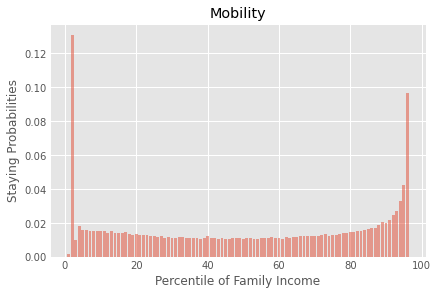

In [6]:
# Bar plot by group (here, percentile)
plt.style.use('ggplot') # select a style (theme) for plot
plt.bar(x, staying_probs, align='center', alpha=0.5)
plt.ylabel('Staying Probabilities')
plt.xlabel('Percentile of Family Income')
plt.title('Mobility')

But bar graphs are more interesting with data by category.  Let's look at measures of mobility by state.

In [7]:
# Read in data by county
county_df = pd.read_excel('http://www.equality-of-opportunity.org/data/descriptive/table1/online_data_tables.xls',
                         sheet_name="Online Data Table 3", header=0, skiprows=list(range(0, 29)) + [30], index_col=0)

# replace missing values with zeros
county_df.fillna(value=0, inplace=True)

# create dataframe with state level data
# compute state level values using weighed avg of counties
state_df = pd.DataFrame({'Absolute Upward Mobility' : county_df.groupby('State').
                         apply(lambda x: np.average(x['Absolute Upward Mobility'],
                                                    weights=x['Number of Children in Core Sample'])),
                         'Gini' : county_df.groupby('State').
                         apply(lambda x: np.average(x['Gini'],
                                                    weights=x['Number of Children in Core Sample']))})

state_df.head(n=10)

,Absolute Upward Mobility,Gini
State,,
Alabama,38.208529,0.490737
Alaska,44.049690,0.330010
Arizona,40.221545,0.463958
Arkansas,39.932534,0.449205
California,43.586976,0.511718
Colorado,43.827203,0.402286
Connecticut,42.612968,0.443647
Delaware,37.685476,0.436552
District of Columbia,35.766250,0.796880


Text(0.5, 1.0, 'Mobility by State')

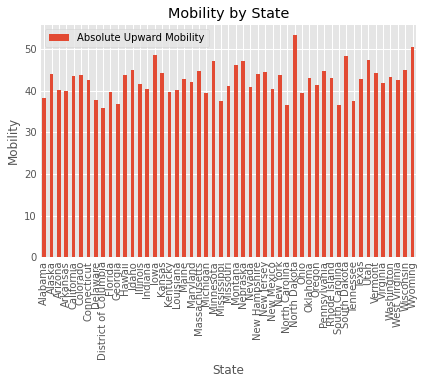

In [8]:
# Bar by with mobility by state
plt.style.use('ggplot') # select a style (theme) for plot
state_df.plot(kind='bar', y="Absolute Upward Mobility", use_index=True)
plt.ylabel('Mobility')
plt.xlabel('State')
plt.title('Mobility by State')

Text(0.5, 1.0, 'Mobility by State')

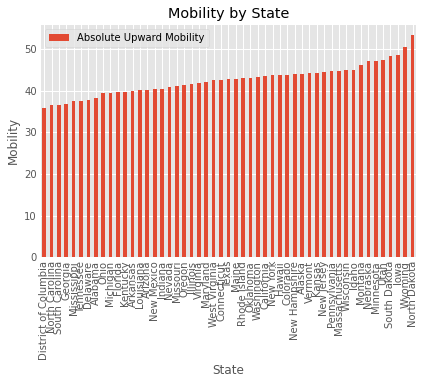

In [9]:
# Sorting the bar plot
# just sort dataframe first
state_df.sort_values(by='Absolute Upward Mobility', inplace=True)
state_df.plot(kind='bar', y="Absolute Upward Mobility", use_index=True)
plt.ylabel('Mobility')
plt.xlabel('State')
plt.title('Mobility by State')

# Histograms

Another way to see how mobility varies would be to look at the distribution across states through a histogram.

Matplotlib is pretty weak with histograms so we'll use another package called Seaborn (which build of Matplotlib, but excels with statistical graphs).

/Users/jason.debacker/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Upward Mobility Across Counties')

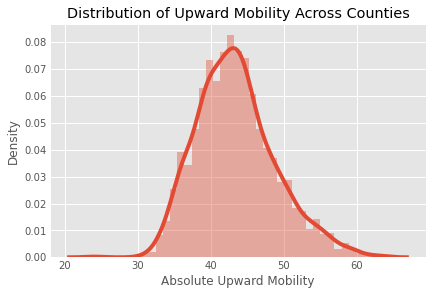

In [10]:
import seaborn as sns
plt.style.use('ggplot') # select a style (theme) for plot
sns.distplot(county_df[county_df['Absolute Upward Mobility'] > 0]['Absolute Upward Mobility'], kde=True, rug=False)
plt.title('Distribution of Upward Mobility Across Counties')

# Scatter Plots


To visualize correlations between variables, scatter plots can be quite useful.  

Let's use a scatter plot to explore the correlation between mobility and teenage child birth.  [Kearney and Levine (*JHR*, 2014)](http://jhr.uwpress.org/content/49/1/1.refs) find that increases in inequality drive increases in teenage child bearning.  But their story largely relies on mobility - that teenages from areas of high inequality view their prospect of economic mobility as low and so do not postpone pregnancy.  Of course, causation can go in the other direction - pregnancy may make mobility difficult - and this something Kearnery and Levine grapple with.

In any case, let's see if there is a relationship in the data by looking at a scatter plot.

Text(0.5, 1.0, 'Mobility and Teenage Births')

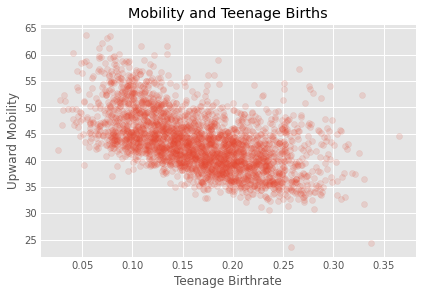

In [11]:
county_df['99/25 Ratio'] = county_df['Parent Income P99'] / county_df['Parent Income P25']
plot_data = county_df[county_df['Absolute Upward Mobility'] > 0]
plt.scatter(plot_data['Teenage Birth Rate'], plot_data['Absolute Upward Mobility'], alpha=0.15, marker='o')
plt.ylabel('Upward Mobility')
plt.xlabel('Teenage Birthrate')
plt.title('Mobility and Teenage Births')

Text(0.5, 1.0, 'Mobility and Teenage Births')

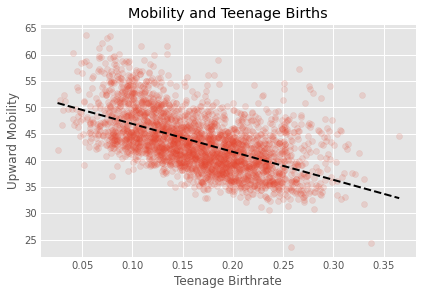

In [12]:
# add a line of best fit
plt.scatter(plot_data['Teenage Birth Rate'], plot_data['Absolute Upward Mobility'], alpha=0.15, marker='o')
plt.plot(np.unique(plot_data['Teenage Birth Rate']),
         np.poly1d(np.polyfit(plot_data['Teenage Birth Rate'],
                              plot_data['Absolute Upward Mobility'], 1))(np.unique(plot_data['Teenage Birth Rate'])),
         color='Black', linestyle="--", linewidth=2)
plt.ylabel('Upward Mobility')
plt.xlabel('Teenage Birthrate')
plt.title('Mobility and Teenage Births')

# 3D plots

Sometimes it's useful to see your data in more than two-dimensions.  Matplotlib allows for some nice 3D plotting.  A typical application is to look at a 3D meshgrid of a surface.  But one can plot historgrams or scatter plots in 3D as well.

Since we have the data loaded, let's just look at a 3D scatter plot to illustrate these capabilities.  We considered the relationship between mobility and teen pregnancy above.  No lets add another covariate, parents' income.

To use `matplotlib notebook`, which will allow you to manipulate the 3D plot in the notebook, you will need to install an extension for Jupyter Lab.  You can do this with:

```
conda install -c conda-forge ipympl
```

or

```
pip install ipympl
```

<IPython.core.display.Javascript object>


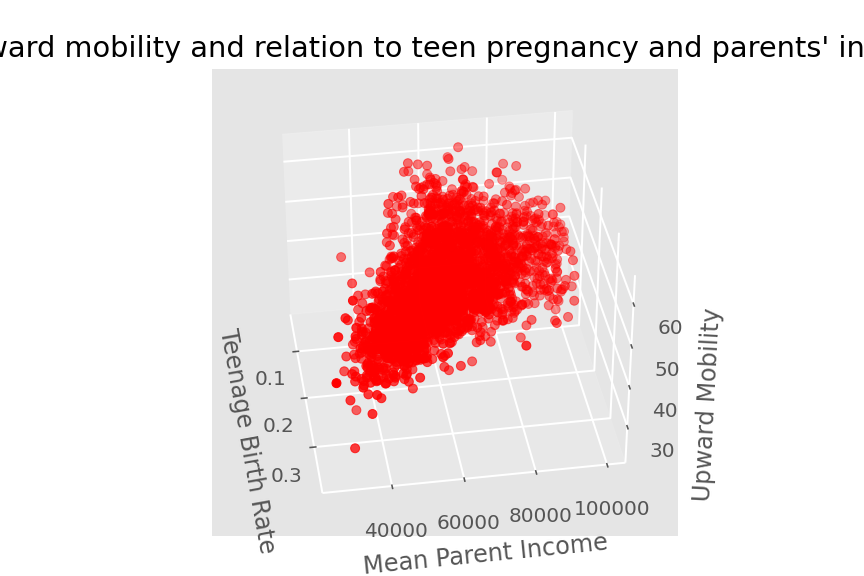

In [18]:
# to show static plot
# %matplotlib inline
# allows you to manipulate plot
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
plot_data2 = plot_data[plot_data['Mean Parent Income'] < 100000]
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(plot_data2['Teenage Birth Rate'], plot_data2['Mean Parent Income'],
           plot_data2['Absolute Upward Mobility'], c='r', marker='o')
ax.view_init(elev=50., azim=15)  # to rotate plot for better view
ax.set_xlabel('Teenage Birth Rate')
ax.set_ylabel('Mean Parent Income')
ax.set_zlabel('Upward Mobility')
plt.title("Upward mobility and relation to teen pregnancy and parents' income")
plt.show()

Tough to view in line here.  If you plot this with a `plt.show()` from iPython, a plot will pop up that you can manipulate so that you can turn to view at different angles.  But this is still somewhat informative.  We can see that mobility is postiviely correlated with income and teen childbearing is negatively correlated with the other two variables.